# TensorFlow的回归模型构建(监督学习)
使用数据集-> California Housing

In [1]:
import os
from tensorflow import keras
import tensorflow as tf
import sklearn
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

## 导入数据集并检视数据

In [2]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape)  # Features
print(housing.target.shape)  # Labels

I0630 11:00:26.823484 140243439564608 california_housing.py:114] Downloading Cal. housing from https://ndownloader.figshare.com/files/5976036 to /home/eequalsmc2/scikit_learn_data


.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

### 检索前五个数据

In [4]:
print("Features:\n", housing.data[:5])
print("Labels:\n", housing.target[:5])

Features:
 [[ 8.32520000e+00  4.10000000e+01  6.98412698e+00  1.02380952e+00
   3.22000000e+02  2.55555556e+00  3.78800000e+01 -1.22230000e+02]
 [ 8.30140000e+00  2.10000000e+01  6.23813708e+00  9.71880492e-01
   2.40100000e+03  2.10984183e+00  3.78600000e+01 -1.22220000e+02]
 [ 7.25740000e+00  5.20000000e+01  8.28813559e+00  1.07344633e+00
   4.96000000e+02  2.80225989e+00  3.78500000e+01 -1.22240000e+02]
 [ 5.64310000e+00  5.20000000e+01  5.81735160e+00  1.07305936e+00
   5.58000000e+02  2.54794521e+00  3.78500000e+01 -1.22250000e+02]
 [ 3.84620000e+00  5.20000000e+01  6.28185328e+00  1.08108108e+00
   5.65000000e+02  2.18146718e+00  3.78500000e+01 -1.22250000e+02]]
Labels:
 [4.526 3.585 3.521 3.413 3.422]


## 把数据集分成 训练集 验证集 测试集
调用sklearn的函数
```py
from sklearn.model_selection import train_test_split
```

In [5]:
from sklearn.model_selection import train_test_split

x_train_all, x_test, y_train_all, y_test = train_test_split(
    housing.data, housing.target, random_state=1)
x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_all, y_train_all, random_state=2)

# 打印各个数据集的shape
for data in x_train, y_train, x_valid, y_valid, x_test, y_test:
    print(data.shape)

(11610, 8)
(11610,)
(3870, 8)
(3870,)
(5160, 8)
(5160,)


## 数据归一化

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(housing.data)

x_train_scaled = scaler.transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

## 构造模型

In [15]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='selu',
                       input_shape=x_train.shape[1:]),  # 8
    keras.layers.Dense(1)
])

model.summary()
model.compile(loss='mean_squared_error', optimizer='sgd')
callbacks = [keras.callbacks.EarlyStopping(patience=10, min_delta=1e-10)]

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 30)                270       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 31        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


## 训练模型

In [16]:
history = model.fit(x_train_scaled, y_train, epochs=1000, validation_data=(
    x_valid_scaled, y_valid), callbacks=callbacks)

Train on 11610 samples, validate on 3870 samples
Epoch 1/1000
11610/11610 [==============================] - 1s 105us/sample - loss: 1.6415 - val_loss: 0.6514
Epoch 2/1000
11610/11610 [==============================] - 1s 56us/sample - loss: 0.6417 - val_loss: 0.5764
Epoch 3/1000
11610/11610 [==============================] - 1s 119us/sample - loss: 0.5723 - val_loss: 0.5446
Epoch 4/1000
11610/11610 [==============================] - 1s 118us/sample - loss: 0.5403 - val_loss: 0.5277
Epoch 5/1000
11610/11610 [==============================] - 1s 118us/sample - loss: 0.5280 - val_loss: 0.5180
Epoch 6/1000
11610/11610 [==============================] - 1s 118us/sample - loss: 0.5207 - val_loss: 0.5125
Epoch 7/1000
11610/11610 [==============================] - 1s 117us/sample - loss: 0.5155 - val_loss: 0.5066
Epoch 8/1000
11610/11610 [==============================] - 1s 119us/sample - loss: 0.5132 - val_loss: 0.5048
Epoch 9/1000
11610/11610 [==============================] - 1s 76us/samp

KeyboardInterrupt: 

## 显示学习曲线图像

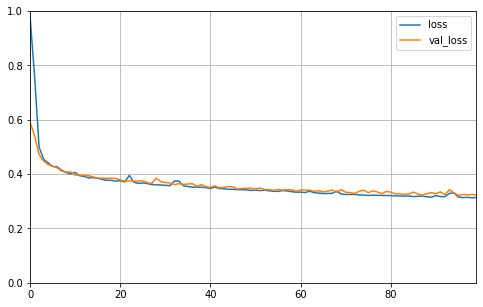

In [73]:
def plot_learning_curve(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()
    
plot_learning_curve(history)    

In [74]:
model.evaluate(x_test_scaled,y_test)

5160/5160 [==============================] - 0s 17us/sample - loss: 0.3391


0.3390780981889991